1. Derivation of the method

    Approximation of the integral using polynomial interpolation

    $$
    \int_{t_{k-1}}^{t_{k+1}}\!\! f \textbf{d}t\approx \frac{h}3(f_{k-1}+4f_{k}+f_{k+1})
    $$

    The iteration of the ODE

    $$
    y_{k+1} = y_{k-1} + h\left(\frac13f_{k-1}+\frac43f_{k}+\frac13f_{k+1}\right)
    $$

2. Exact solution

    The general solution is $y=\mathbf{e}^{-t}(\alpha\sin4t+\beta\cos4t)$

    $y'=\mathbf{e}^{-t}\left((4\alpha-\beta)\cos4t-(\alpha+4\beta)\sin4t\right)$

    Therefore, the solution that satisfies the initial condition is
    $y=\mathbf{e}^{-t}(\dfrac14\sin4t+\cos4t)$

3. _

    $$
    y' = v\\
    v' = -2v-17y
    $$

    The iteration method becomes

    $$
    \begin{pmatrix}
    y_{k+1}\\
    v_{k+1}
    \end{pmatrix}=\begin{pmatrix}
    y_{k-1}\\
    v_{k-1}
    \end{pmatrix}+\frac h3\begin{pmatrix}
    v_{k-1}\\
    -2v_{k-1}-17y_{k-1}
    \end{pmatrix}+\frac{4h}3\begin{pmatrix}
    v_{k}\\
    -2v_{k}-17y_{k}
    \end{pmatrix}+\frac h3\begin{pmatrix}
    v_{k+1}\\
    -2v_{k+1}-17y_{k+1}
    \end{pmatrix}\\
    \begin{pmatrix}
    3y_{k+1}-hv_{k+1}\\
    17hy_{k+1}+(3+2h)v_{k+1}
    \end{pmatrix}=\begin{pmatrix}
    3y_{k-1}\\
    3v_{k-1}
    \end{pmatrix}+h\begin{pmatrix}
    v_{k-1}\\
    -2v_{k-1}-17y_{k-1}
    \end{pmatrix}+4h\begin{pmatrix}
    v_{k}\\
    -2v_{k}-17y_{k}
    \end{pmatrix}
    $$

    The comparison of the solutions is [here](#Plot-of-solution). The accuracy of
    the method can be seen from [here](#Accuracy) where the error drop by 8 orders of
    magnitude when $h$ decreases by 2 orders of magnitude.

4. The accuracy when the second step is determined by forward Euler step is
    plotted [here](#Accuracy-with-bad-initial). The accuracy is limited by the
    accuracy of the initial condition.

In [1]:
using PyPlot

In [2]:
f_exact(t) = exp(-t) * (sin(4t) / 4 + cos(4t))
f_exact(ts::AbstractVector) = [f_exact(t) for t in ts]
f′_exact(t) = -exp(-t) * sin(4t) * (4 + 1 / 4)

f′_exact (generic function with 1 method)

In [3]:
# Very specialized function to solve the equation in problem 4
function gen_A(ts::Range)
    h = step(ts)
    A_mat = [  3       -h
             17h (3 + 2h)]
    factorize(A_mat)
end
function solve4(y1, y2, ts::Range, A=gen_A(ts))
    len = length(ts)
    res = Matrix{Float64}(len, 2)
    res[1, :] = y1
    res[2, :] = y2
    y_prev = copy!(Vector{Float64}(2), y1)
    y_cur = copy!(Vector{Float64}(2), y2)
    b = Vector{Float64}(2)
    h = step(ts)
    @inbounds for i in 3:len
        b[1] = 3 * y_prev[1] + h * y_prev[2] + 4h * y_cur[2]
        b[2] = (3 * y_prev[2] - h * (2 * y_prev[2] + 17 * y_prev[1])
                - 4h * (2 * y_cur[2] + 17 * y_cur[1]))
        A_ldiv_B!(A, b)
        for j in 1:2
            y_prev[j] = y_cur[j]
            res[i, j] = y_cur[j] = b[j]
        end
    end
    res
end

solve4 (generic function with 2 methods)

In [4]:
ts_02 = 0.0:0.02:3.0
res = solve4([1, 0], [f_exact(ts_02[2]), f′_exact(ts_02[2])], ts_02);

#### Plot of solution

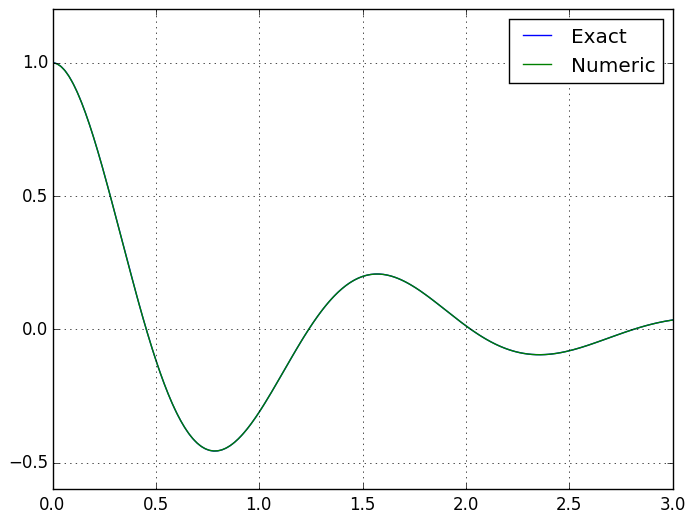

In [5]:
ts_plot = linspace(0, 3, 1000)
plot(ts_plot, f_exact(ts_plot), label="Exact")
plot(ts_02, res[:, 1], label="Numeric")
legend()
grid()

In [6]:
function error_3(h)
    ts = 0.0:h:3.0
    res = solve4([1, 0], [f_exact(ts[2]), f′_exact(ts[2])], ts)
    end_solve = res[end, 1]
    end_exact = f_exact(ts[end])[1]
    return abs(end_solve - end_exact)
end

error_3 (generic function with 1 method)

#### Accuracy

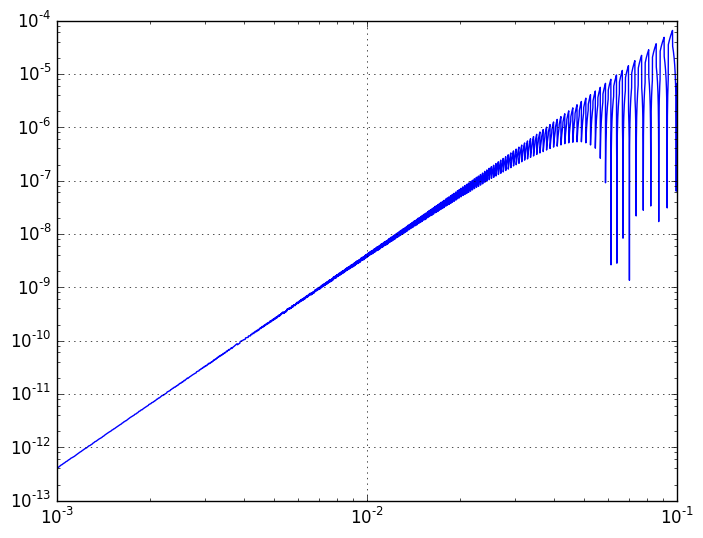

In [7]:
hs = linspace(1e-3, 1e-1, 10000)
errors = [error_3(h) for h in hs];
plot(hs, errors)

gca()[:set_xscale]("log", nonposx="clip")
gca()[:set_yscale]("log", nonposy="clip")

grid()

In [8]:
function error_3′(h)
    ts = 0.0:h:3.0
    res = solve4([1, 0], [1, -17h], ts)
    end_solve = res[end, 1]
    end_exact = f_exact(ts[end])[1]
    return abs(end_solve - end_exact)
end

error_3′ (generic function with 1 method)

#### Accuracy with bad initial

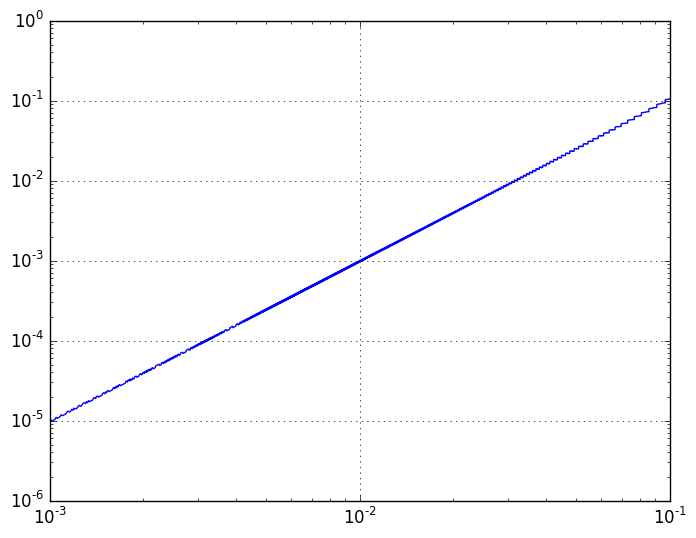

In [9]:
hs = linspace(1e-3, 1e-1, 10000)
errors = [error_3′(h) for h in hs];
plot(hs, errors)

gca()[:set_xscale]("log", nonposx="clip")
gca()[:set_yscale]("log", nonposy="clip")

grid()